## Preprocessing

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.3 MB/s eta 0:00:00


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the 'EIN' column
application_df = application_df.drop(['EIN'], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
columns_counts = application_df.nunique(axis=0)
print(columns_counts)

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [4]:
# Look at NAME value counts for binning
name_counts = application_df['NAME'].value_counts()
print(name_counts)

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64


In [5]:
# Creating bins for NAME according to the times that association applied
# Define the bins and labels
bins = [0, 2, 4, 9, 99, np.inf]
labels = ['First time', '2-4', '5-9', '10-99', 'Over 100']

# Reset the index of name_counts and create a mapping dictionary
name_mapping = name_counts.reset_index().set_index('index').to_dict()['NAME']

# Map the name_mapping to the 'NAME' column and assign labels based on the bins
application_df['TIMES_APPLIED'] = application_df['NAME'].map(name_mapping).fillna(1)
application_df['TIMES_APPLIED'] = pd.cut(application_df['TIMES_APPLIED'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,TIMES_APPLIED
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,5-9
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,First time
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,First time
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,First time
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,First time


In [6]:
# Look at APPLICATION_TYPE value counts for binning
apptype_counts = application_df['APPLICATION_TYPE'].value_counts()
print(apptype_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [7]:
from itertools import count
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = apptype_counts[apptype_counts < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
print(class_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Get the value counts for 'CLASSIFICATION'
class_counts = application_df['CLASSIFICATION'].value_counts()

# Print 'CLASSIFICATION' value counts greater than 1
for classification, count in class_counts.items():
    if count > 1:
        print(f"{classification}: {count}")

C1000: 17326
C2000: 6074
C1200: 4837
C3000: 1918
C2100: 1883
C7000: 777
C1700: 287
C4000: 194
C5000: 116
C1270: 114
C2700: 104
C2800: 95
C7100: 75
C1300: 58
C1280: 50
C1230: 36
C1400: 34
C7200: 32
C2300: 32
C1240: 30
C8000: 20
C7120: 18
C1500: 16
C1800: 15
C6000: 15
C1250: 14
C8200: 11
C1238: 10
C1278: 10
C1235: 9
C1237: 9
C7210: 7
C2400: 6
C1720: 6
C4100: 6
C1257: 5
C1600: 5
C1260: 3
C2710: 3
C0: 3
C3200: 2
C1234: 2
C1246: 2
C1267: 2
C1256: 2


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts[class_counts < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Creating bins for ASK_AMT
application_df['ASK_AMT_Bins'] = pd.cut(application_df['ASK_AMT'], bins=[0, 5001, np.inf], labels=['5000', 'Over 5000'])

application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,TIMES_APPLIED,ASK_AMT_Bins
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,5-9,5000
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,First time,Over 5000
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,First time,5000
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,First time,Over 5000
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,First time,Over 5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,First time,5000
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,Over 100,5000
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,5-9,5000
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,First time,5000


In [12]:
# Check to make sure binning was successful
application_df['ASK_AMT_Bins'].value_counts()

5000         25399
Over 5000     8900
Name: ASK_AMT_Bins, dtype: int64

In [13]:
# Drop the ASK_AMT and NAME columns
application_df = application_df.drop(['ASK_AMT', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,TIMES_APPLIED,ASK_AMT_Bins
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,5-9,5000
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,First time,Over 5000
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,First time,5000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,First time,Over 5000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,First time,Over 5000


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)

# Review df
dummies_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,TIMES_APPLIED_First time,TIMES_APPLIED_2-4,TIMES_APPLIED_5-9,TIMES_APPLIED_10-99,TIMES_APPLIED_Over 100,ASK_AMT_Bins_5000,ASK_AMT_Bins_Over 5000
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [15]:
# Split our preprocessed data into our features and target arrays
y = dummies_df['IS_SUCCESSFUL'].values.reshape([-1, 1])
X = dummies_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Using autotuner to determine the best model

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=49))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 01m 05s]
val_accuracy: 0.5292128324508667

Best val_accuracy So Far: 0.7456559538841248
Total elapsed time: 00h 30m 26s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 7,
 'units_1': 1,
 'units_2': 9,
 'units_3': 3,
 'units_4': 7,
 'units_5': 3,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn_model = tf.keras.models.Sequential()

# Input layer
nn_model.add(tf.keras.layers.Dense(units=9, activation="relu", input_dim=number_input_features))

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=9, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Fourth hidden layer
nn_model.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 450       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
 dense_2 (Dense)             (None, 9)                 18        
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
 dense_4 (Dense)             (None, 7)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 544
Trainable params: 544
Non-trainable pa

In [18]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.6378
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6093 - accuracy: 0.6851
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5867 - accuracy: 0.7154
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5732 - accuracy: 0.7254
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7272
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5681 - accuracy: 0.7277
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5670 - accuracy: 0.7284
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5642 - accuracy: 0.7296
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5501 - accuracy: 0.7373 - 573ms/epoch - 2ms/step
Loss: 0.5501152276992798, Accuracy: 0.7372594475746155


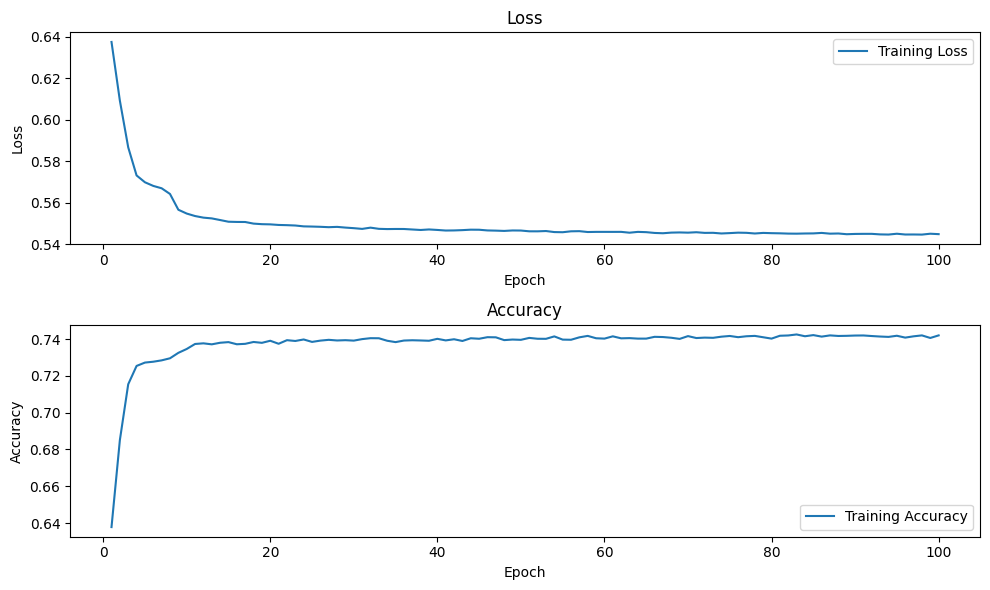

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss and accuracy on the same graph
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1 (top plot)
plt.plot(history_df['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2 (bottom plot)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # To prevent overlapping labels
plt.show()

In [22]:
# Export our model to HDF5 file
from keras.models import load_model
model_filename = 'AlphabetSoupCharity_Autotune.h5'

# Save the model to an HDF5 file
nn_model.save(model_filename)